# Modelo regresión lineal

In [21]:
# Importar liberías y cargar datos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from pickle import dump

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Almacenar datos

df.to_csv('../data/raw/df_raw.csv',index=False)

Análisis exploratorio

In [ ]:
# Descripción de los datos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
df.shape

(1338, 7)

In [24]:
# Validar duplicados

df.duplicated().sum()

np.int64(1)

In [34]:
df = df.drop_duplicates()

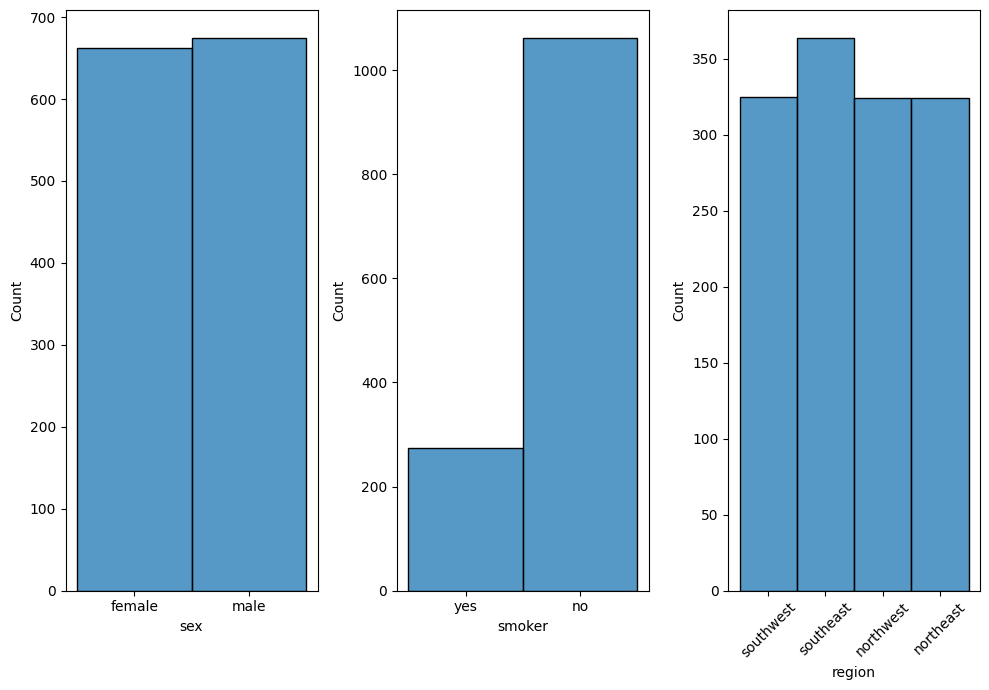

In [31]:
# Análisis variables categóricas:

fig, axis = plt.subplots(1, 3, figsize=(10, 7))

sns.histplot(ax=axis[0], data=df, x='sex')
sns.histplot(ax=axis[1], data=df, x='smoker')
sns.histplot(ax=axis[2], data=df, x='region')
axis[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


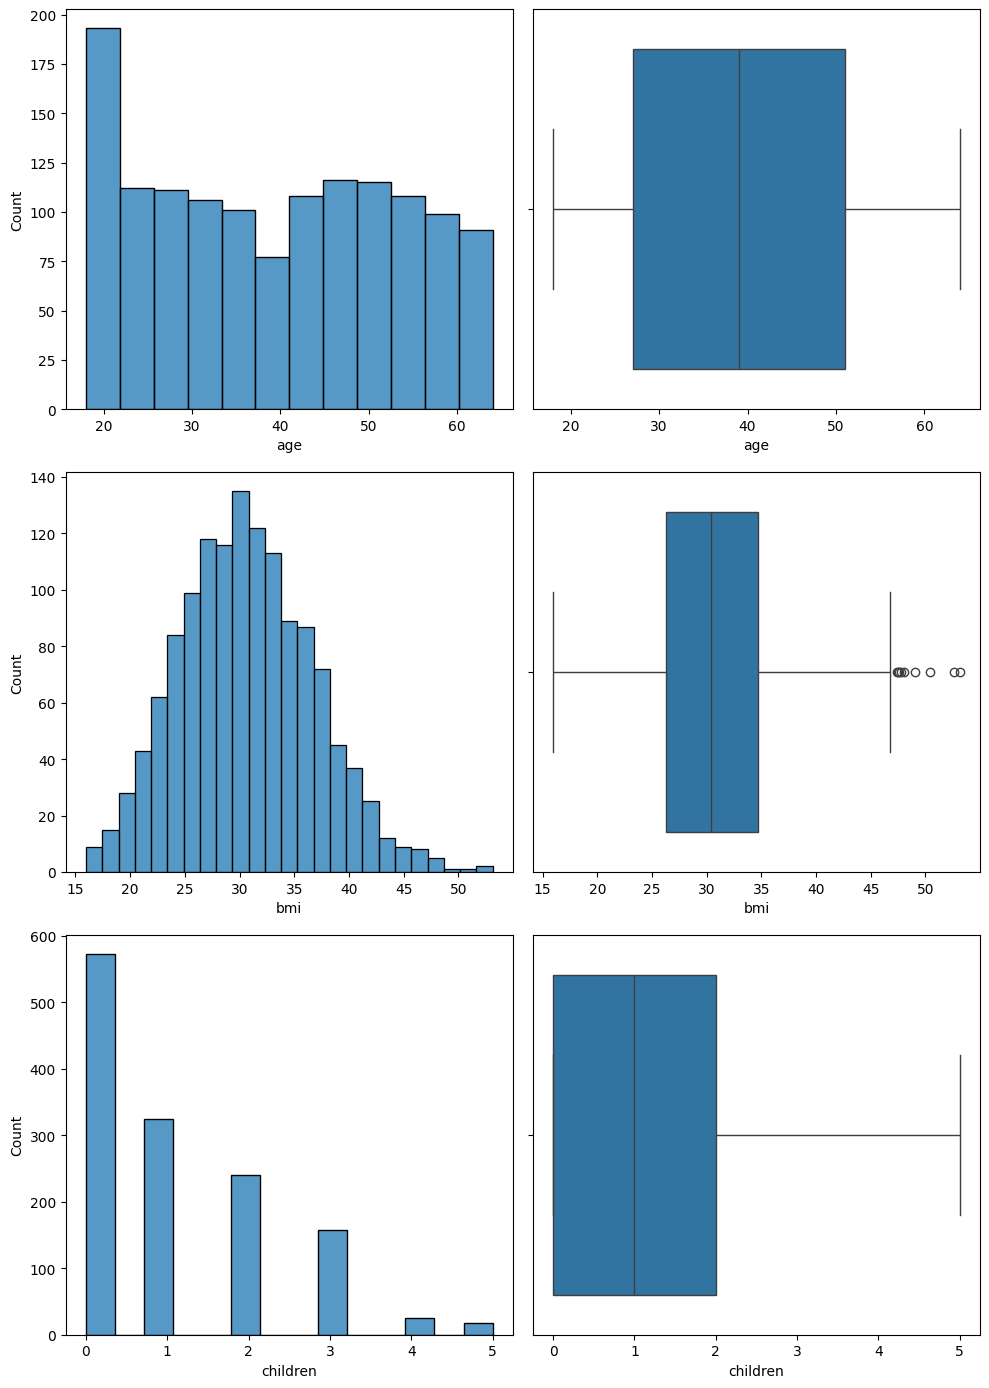

In [ ]:
# Análisis variables numéricas

fig, axis = plt.subplots(3, 2, figsize=(10, 14))

sns.histplot(ax=axis[0, 0], data=df, x='age')
sns.boxplot(ax=axis[0, 1], data=df, x='age')

sns.histplot(ax=axis[1, 0], data=df, x='bmi')
sns.boxplot(ax=axis[1, 1], data=df, x='bmi')

sns.histplot(ax=axis[2, 0], data=df, x='children')
sns.boxplot(ax=axis[2, 1], data=df, x='children')

plt.tight_layout()
plt.show()


In [10]:
# factorizar variables categóricas

for columna in df.columns:
    if df[columna].dtype not in ('int64', 'float64'):
        df[columna] = pd.factorize(df[columna])[0]

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


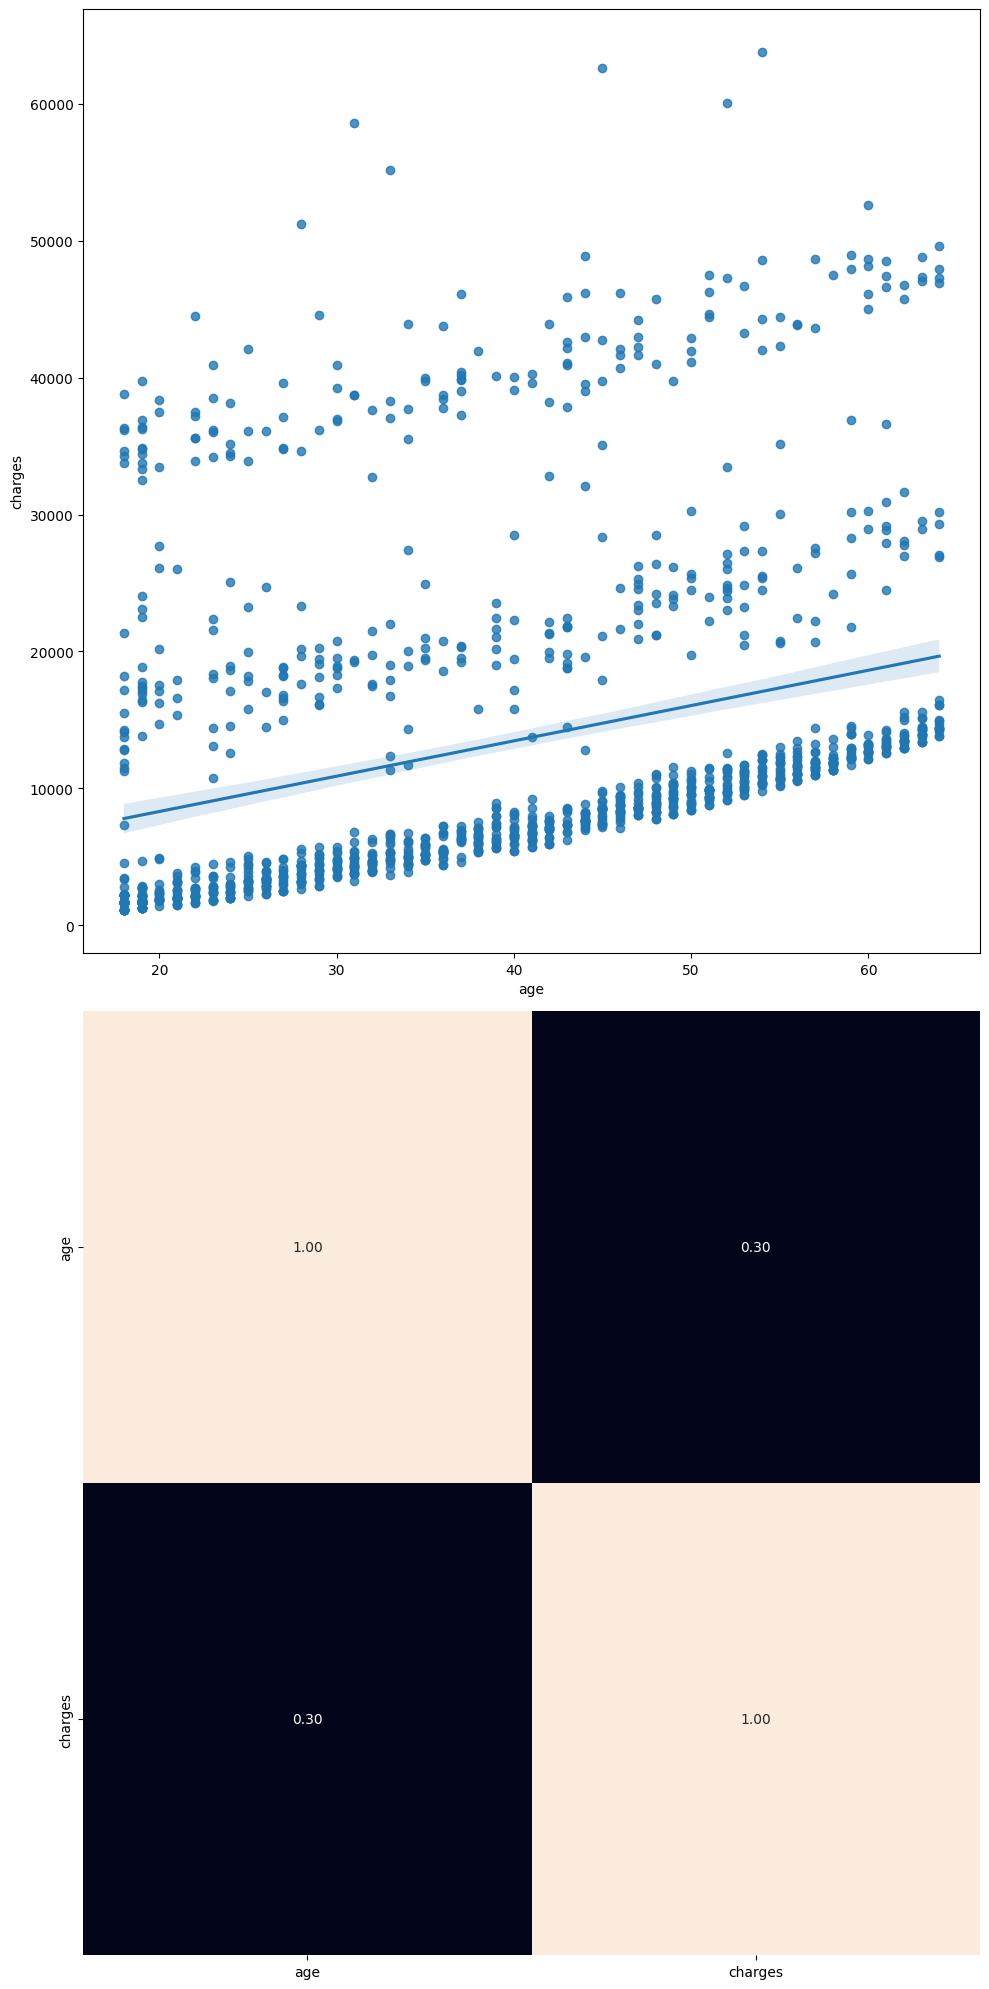

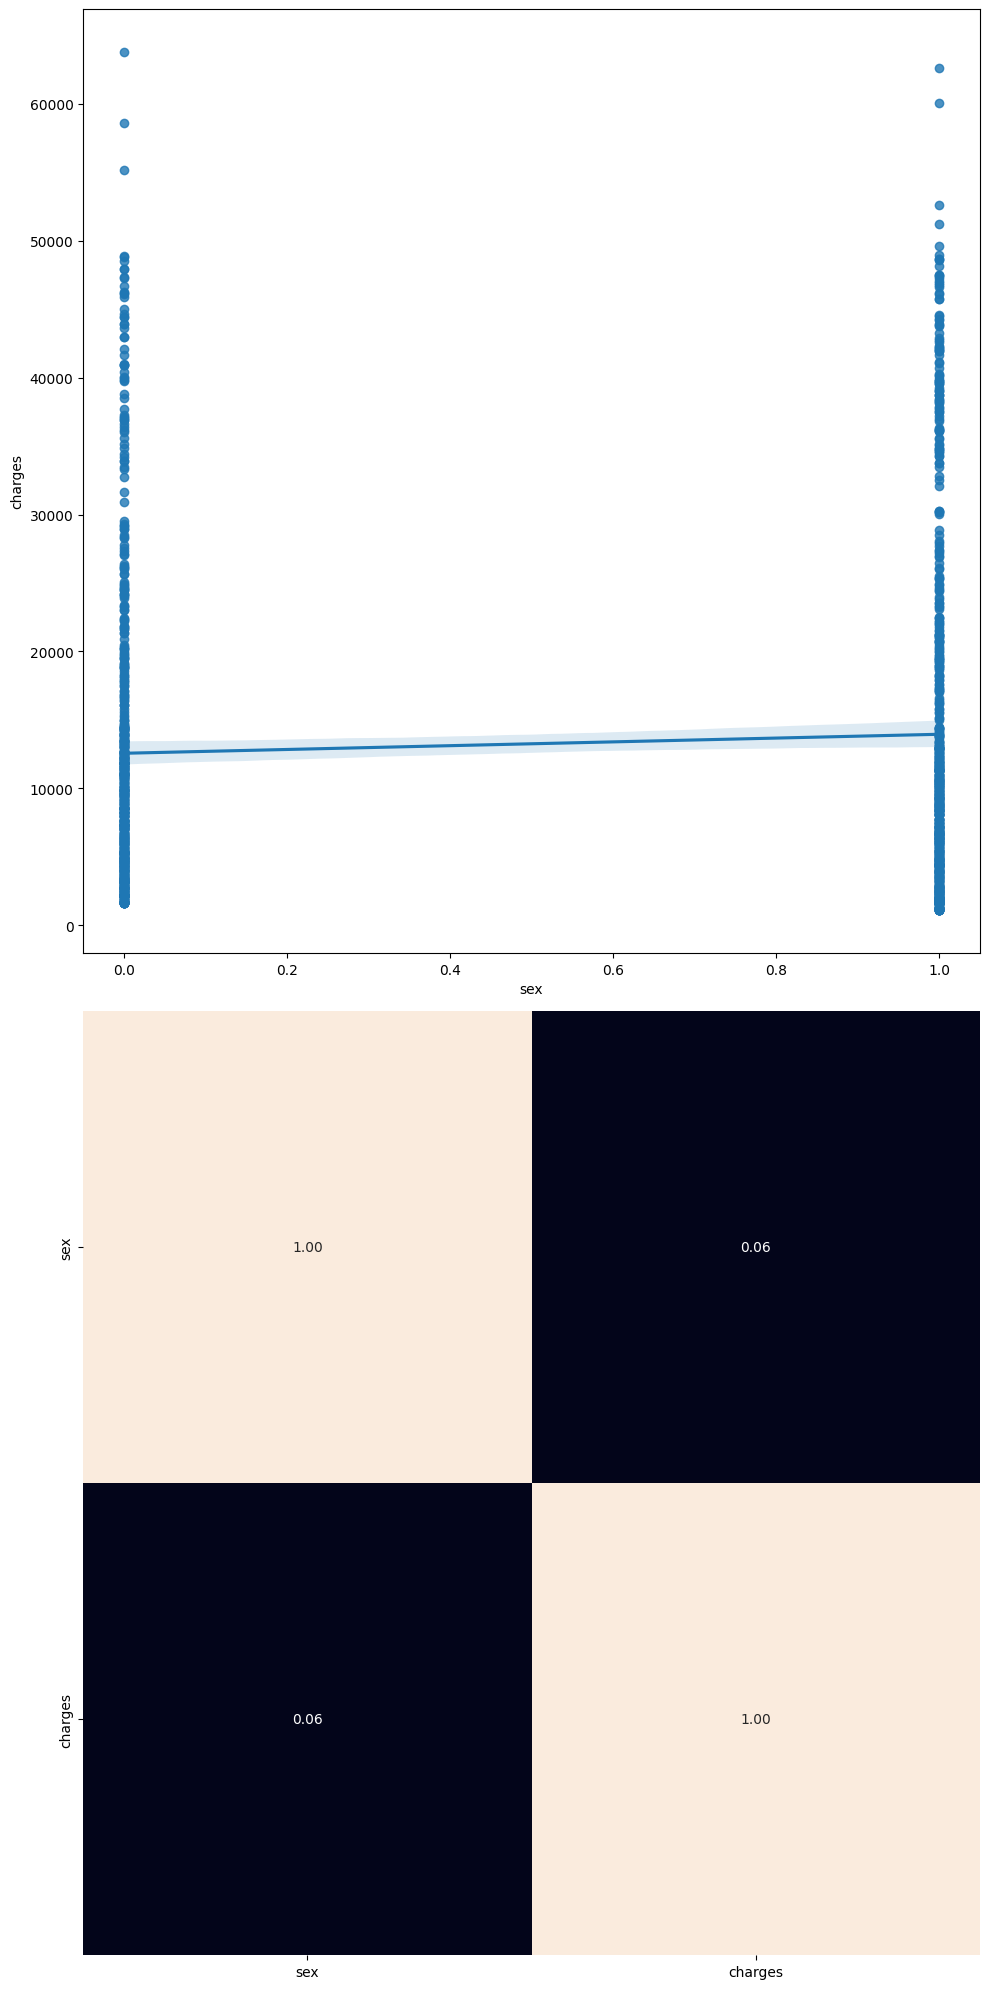

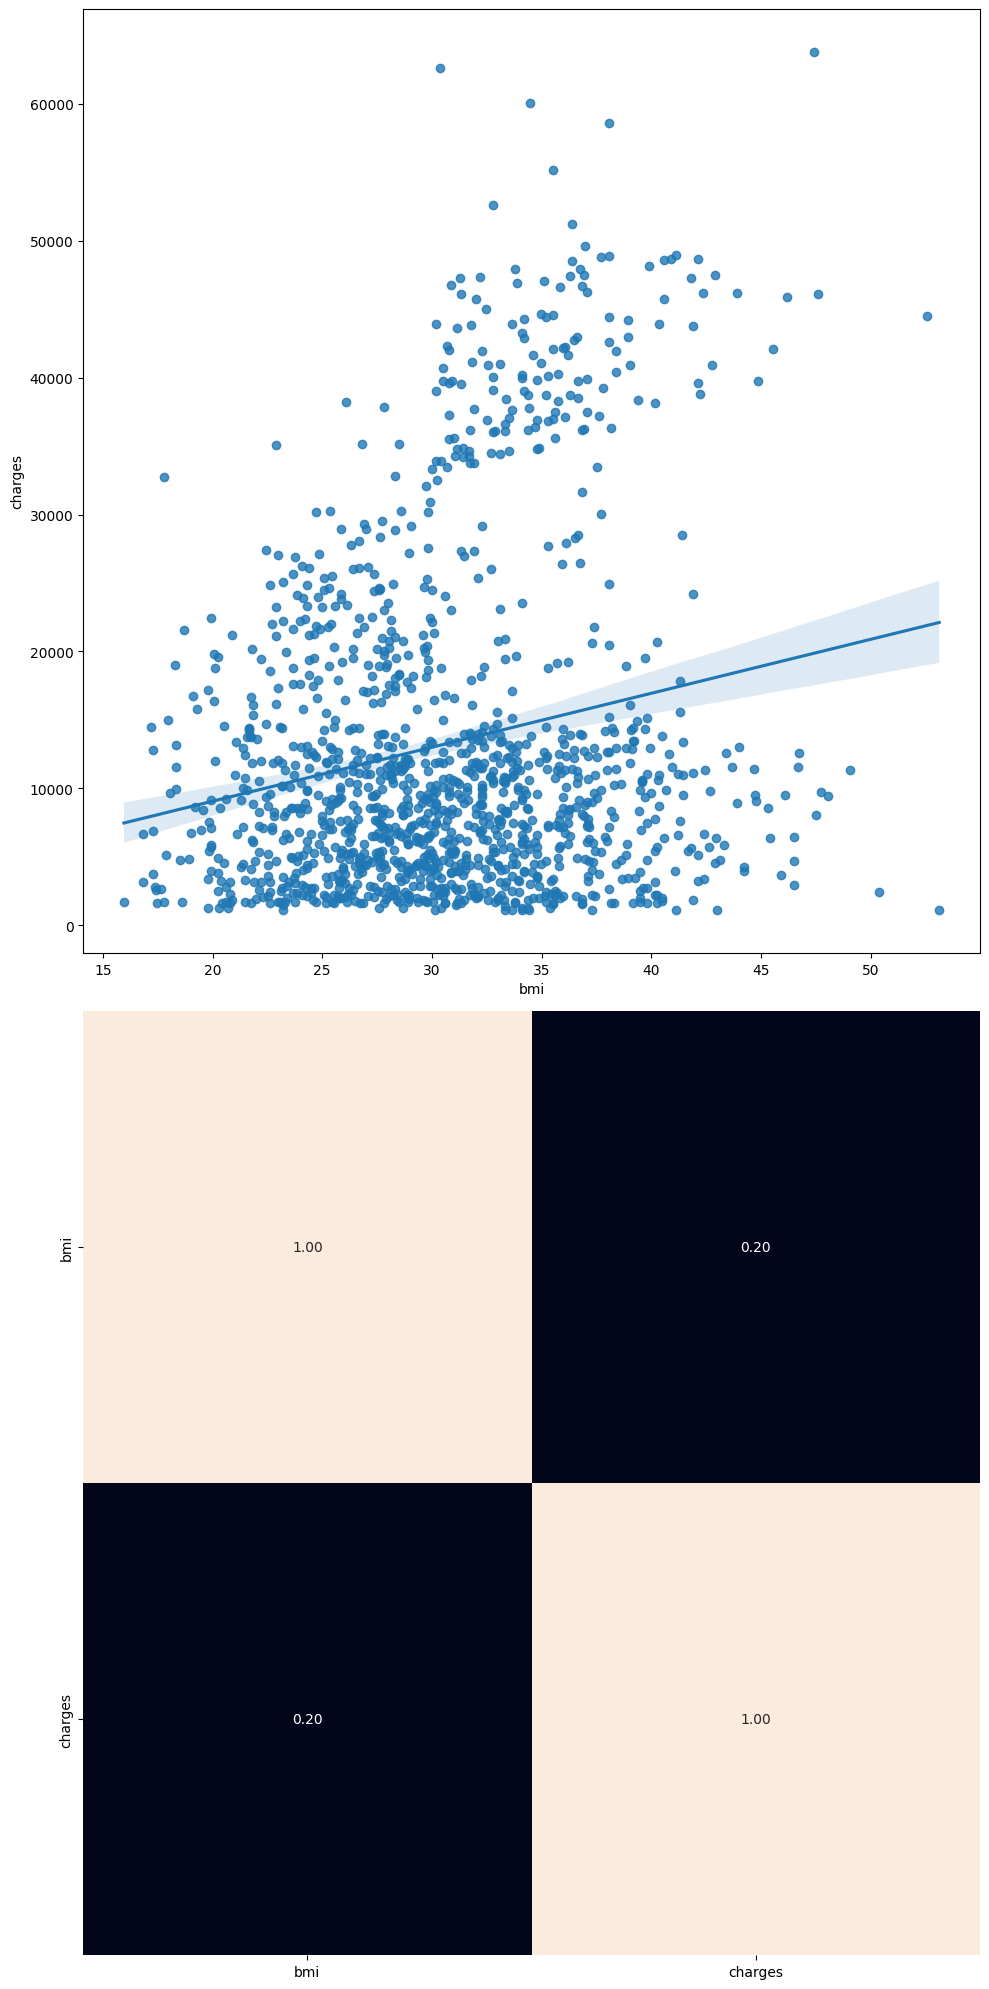

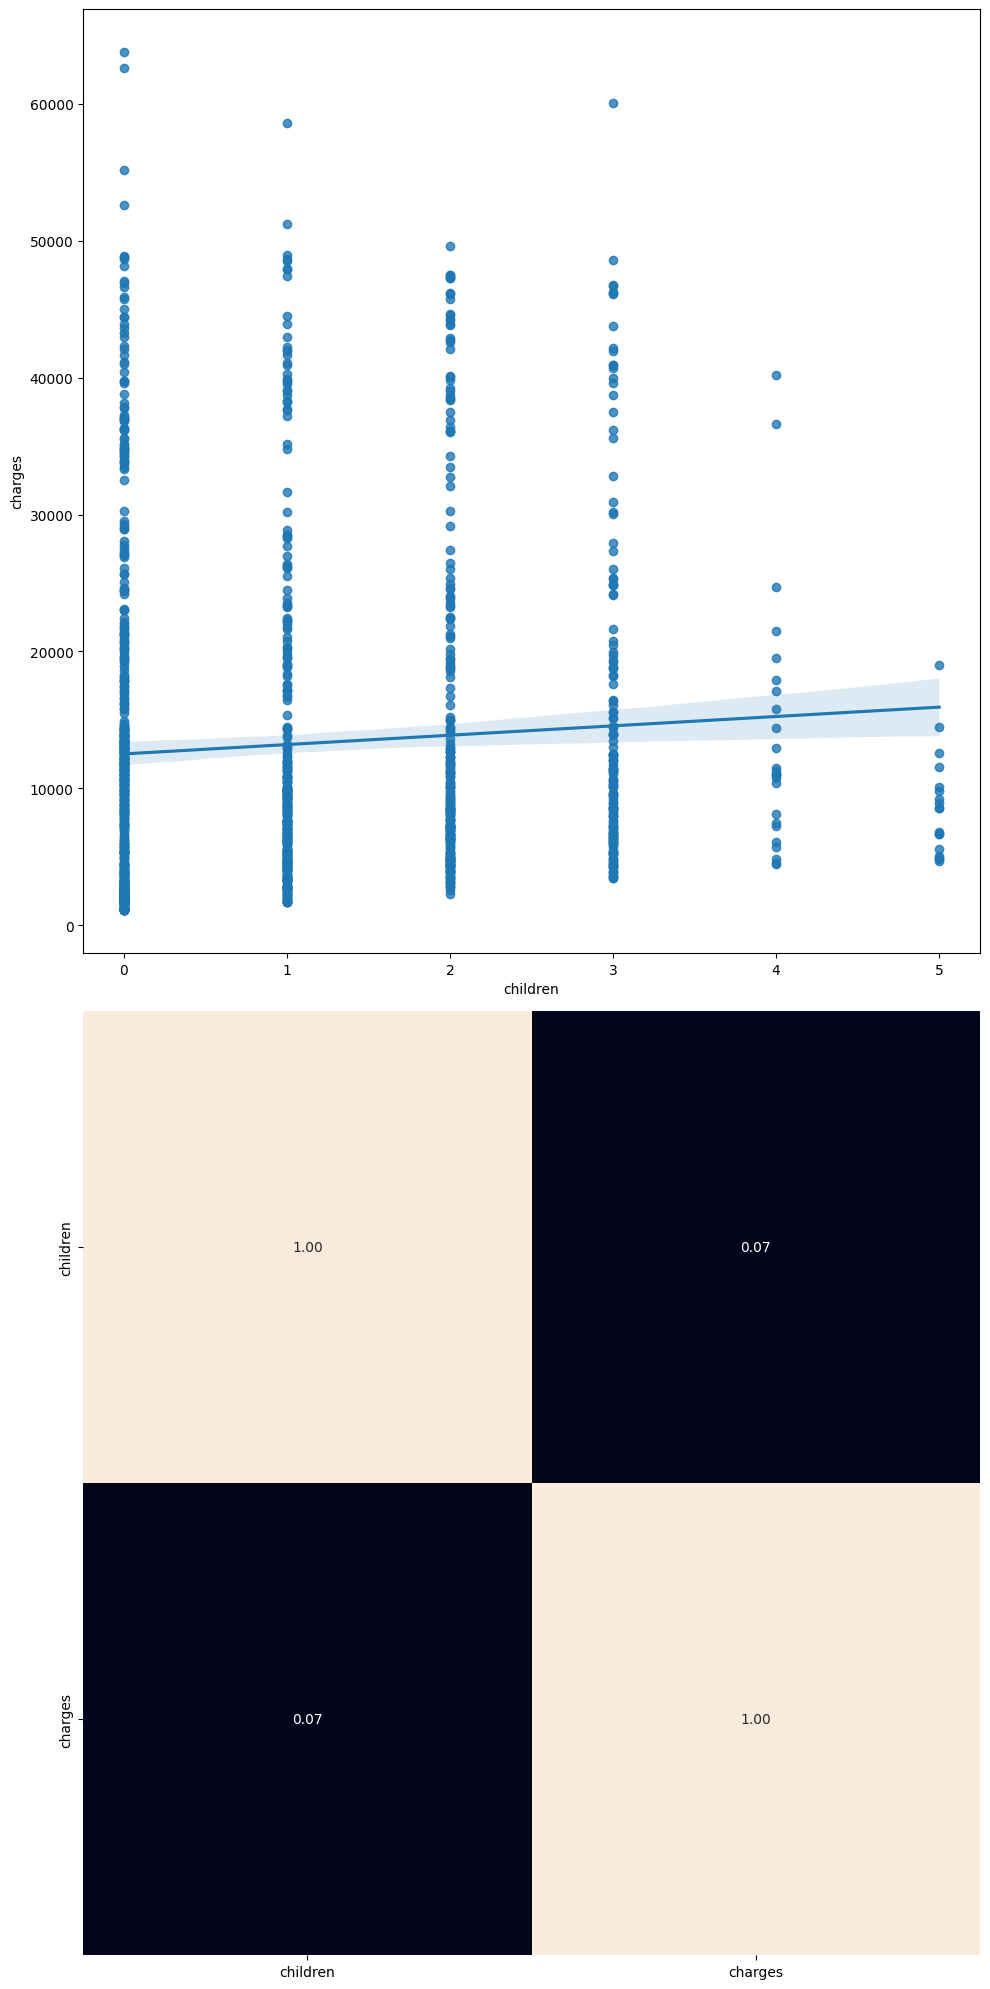

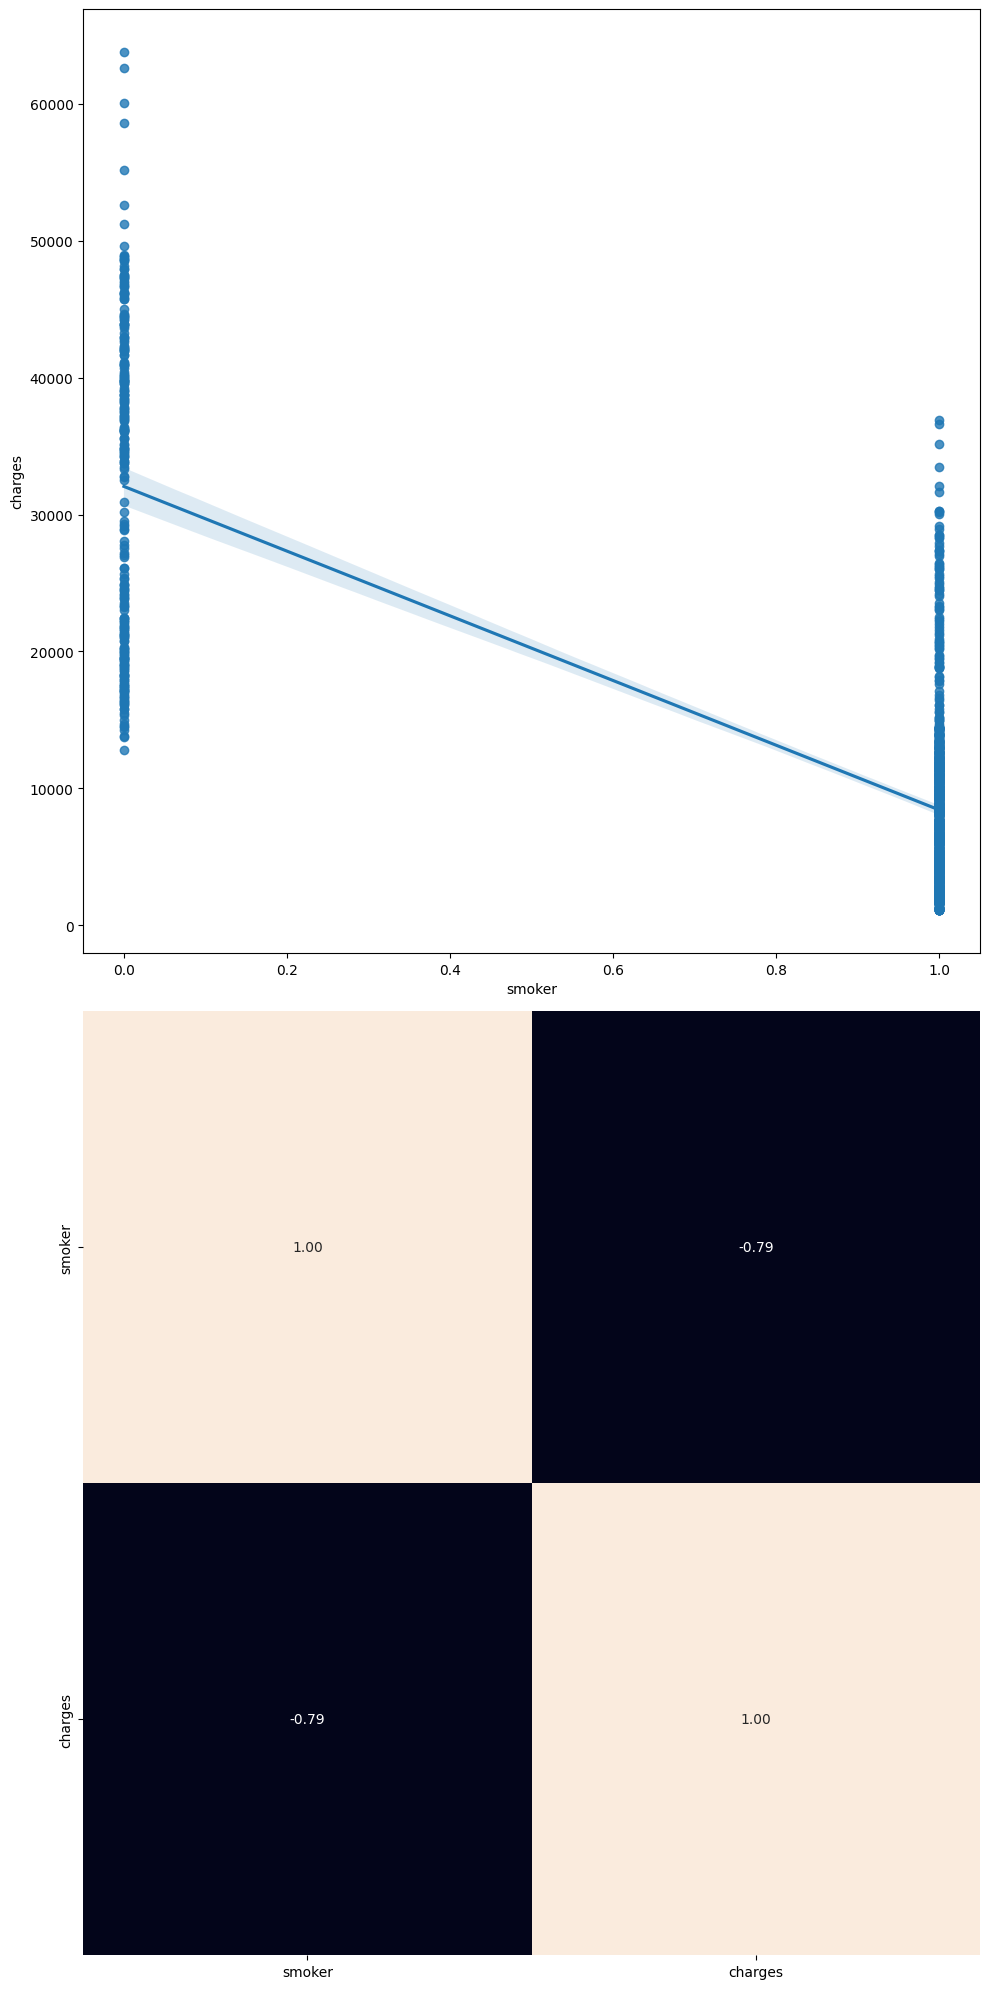

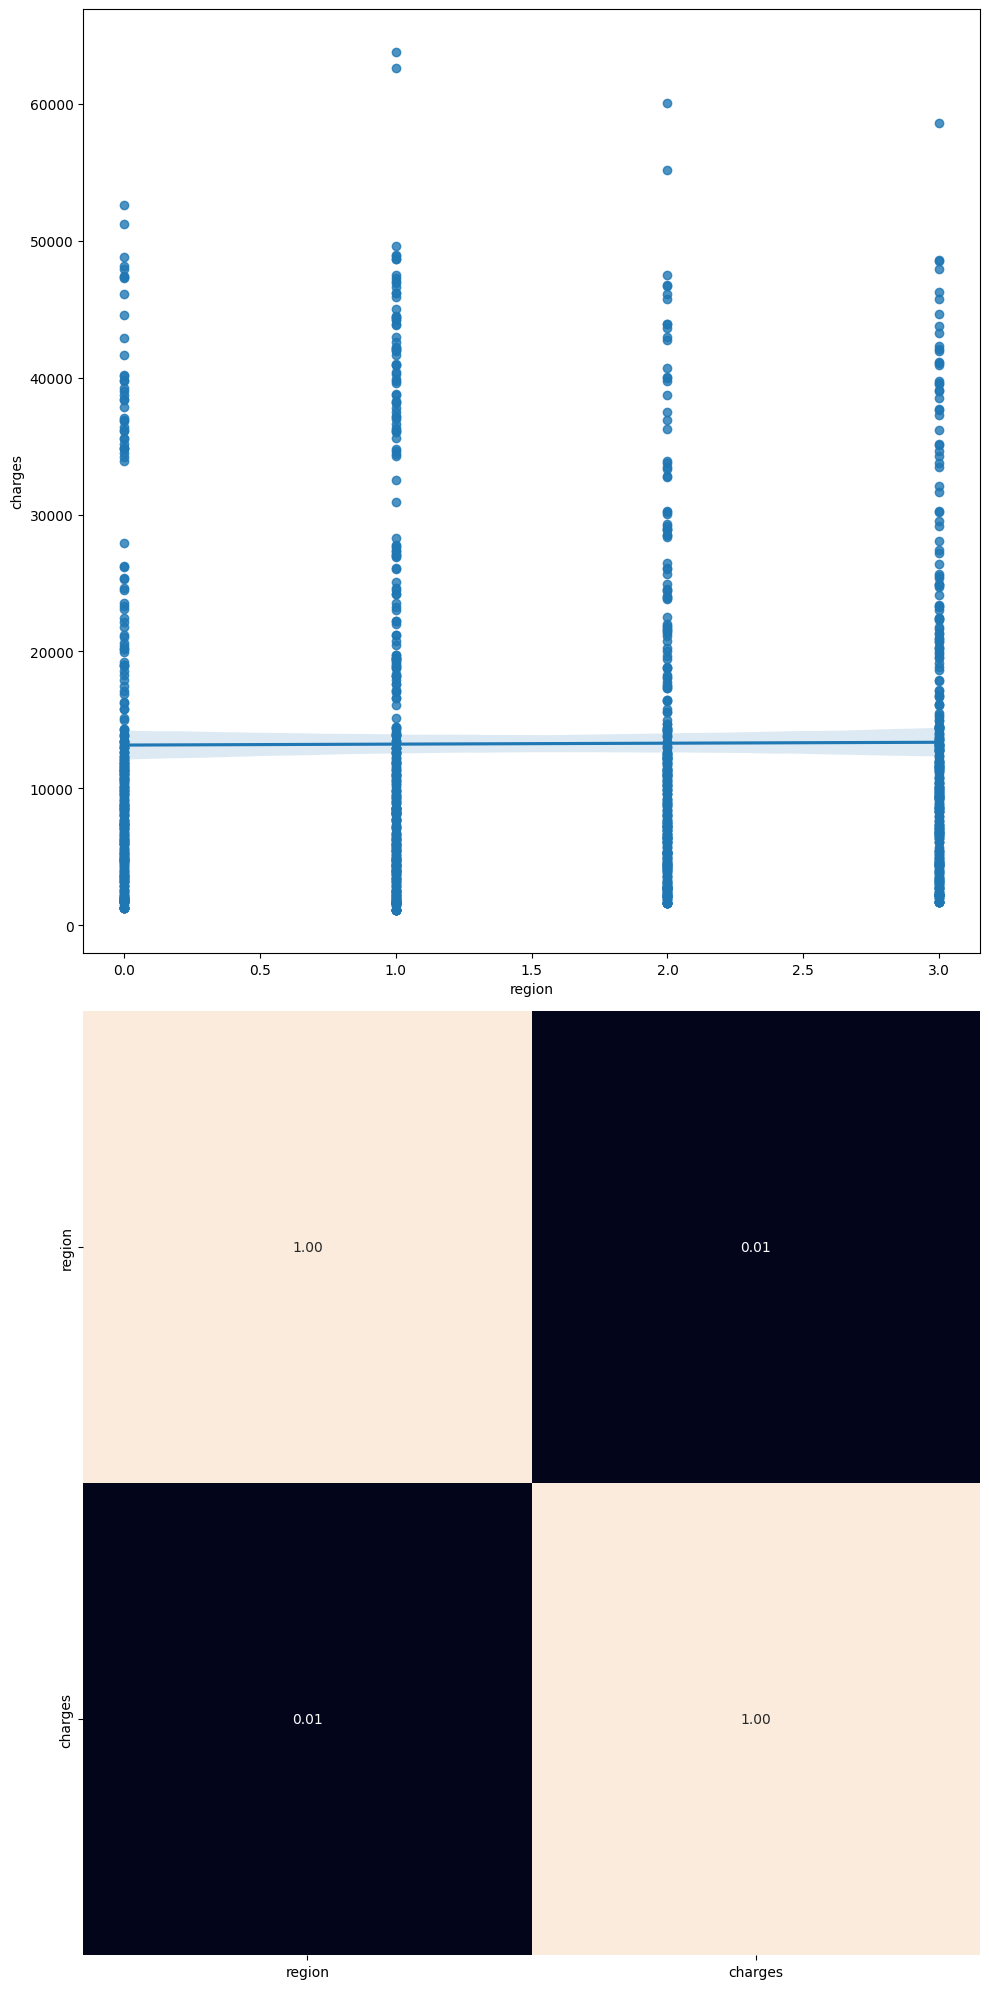

In [ ]:


# validar relaciones
for columna in df.columns:
    if columna != 'charges':
        fig, axes = plt.subplots(2, 1, figsize=(10, 20))

        # Gráfico de dispersión
        sns.regplot(x=columna, y='charges', data=df, ax=axes[0])

        # Mapa de calor de correlación
        corr_matrix = df[[columna, 'charges']].corr()
        sns.heatmap(corr_matrix, annot=True, fmt=".2f", ax=axes[1], cbar=False)

        plt.tight_layout()
        plt.show()


Luego de análisis exploratorio se determina que las únicas variables con una correlación relevante son: smoker, age y bmi
Estas son las variables que se utilizarán para la construcción del modelo

Construcción del modelo de regresión

In [ ]:
# Separa variable objetivo de predictoras, así como dividir datos para entrenamiento y pruebas

X = df[['smoker','age','bmi']]
y = df['charges']


X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
X_train.head()

,smoker,age,bmi
560,1,46,19.95
1285,1,47,24.32
1142,1,52,24.86
969,1,39,34.32
486,1,54,21.47


In [ ]:
# normalizar

scaler = MinMaxScaler()
X_train_esc = scaler.fit_transform(X_train, y_train)
X_test_esc = scaler.transform(X_test)

X_train_esc = pd.DataFrame(X_train_esc,columns=X_train.columns,index=X_train.index)
X_test_esc = pd.DataFrame(X_test_esc,columns=X_test.columns,index=X_test.index)




In [ ]:
# Construcción del modelo

model = LinearRegression()
model.fit(X_train_esc, y_train)

print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2, b3): {model.coef_}")

Intercepto (a): 21847.09890044787
Coeficientes (b1, b2, b3): [-23675.37184666  11932.86941266  12134.15512912]


In [ ]:
# Ejecución

y_pred = model.predict(X_test_esc)
y_pred

array([ 8.18404147e+03,  7.43100100e+03,  3.73464371e+04,  8.62952830e+03,
        2.73166548e+04,  1.11168596e+04,  5.71018530e+02,  1.72685468e+04,
        1.20000791e+03,  1.03691549e+04,  2.77152613e+04,  8.91412866e+03,
        5.47475597e+03,  3.77256063e+04,  4.08905253e+04,  3.68718212e+04,
        1.49361936e+04,  3.61177211e+04,  9.38199609e+03,  3.18988228e+04,
        2.57961333e+03,  1.00891140e+04,  3.14507861e+03,  6.99357366e+03,
        1.04424884e+04,  1.29687423e+04,  1.53152131e+04,  5.22036025e+03,
        9.16805346e+03,  2.80079135e+03,  8.23359765e+03,  1.34678580e+04,
        5.12313156e+03,  2.58718594e+03,  4.83036995e+03,  1.29600084e+04,
        2.35809809e+03,  9.20769841e+03,  3.33341443e+04,  3.27973851e+04,
        2.55746819e+03,  4.23343695e+03,  1.45060874e+04,  1.19088226e+04,
        8.52333022e+03,  1.25747811e+04,  4.71833327e+03,  2.71019342e+03,
        3.48646232e+04,  8.86633842e+03,  1.64851840e+04,  2.54942467e+03,
        1.21901745e+04,  

In [ ]:
# Validación de resultados

print(f"Error cuadrito medio en raíz (rmse) : {root_mean_squared_error(y_test,y_pred)}")
print(f"R2 : {r2_score(y_test,y_pred)}")

Error cuadrito medio en raíz (rmse) : 5874.763304187488
R2 : 0.7776932310583375


In [ ]:
# Almacenar modelo

dump(model,open('../models/linear_regression.model','wb'))

CONCLUSIONES:

- Con las variables seleccionadas el modelo está en capacidad de explicar el 77% de los eventos
- Las variables no tienen la correlación suficiente con la variable objetivo, por lo que es recomendable explorar otros modelos
- A pesar de contar con pocas variables, el modelo de regresión lineal logra un resultado de 77% evidenciando que es un modelo útil para diversos escenarios aún con poca información. 
- Desde el análisis exploratorio se puede ir identificando si el modelo de regresión lineal es el adecuado o no.